# Working Test Space

In [20]:
# Dependencies
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd
import scipy.stats as stats
import warnings

# Suppress warnings
warnings.filterwarnings("ignore")


Edu_Set = pd.read_csv('../Resources/dataset.csv')
Student_Population = Edu_Set['Target'].count()

In [21]:
# Rename Columns to Correct Names
Edu_Set.rename(columns={'Nacionality': 'Nationality'}, inplace=True)

In [22]:
# Replace Int values with names
Edu_Set['Marital status'].replace({1: 'Single', 2: 'Married', 3: 'Widower', 4: 'Divorced', 5: 'Facto union', 6: 'Legally separated'}, inplace=True)
Edu_Set['Nationality'].replace({1: 'Portuguese', 2: 'German', 3: 'Spanish', 4: 'Italian', 5: 'Dutch',
6: 'English', 7: 'Lithuanian', 8: 'Angolan', 9: 'Cape Verdean', 10: 'Guinean',
11: 'Mozambican', 12: 'Santomean', 13: 'Turkish', 14: 'Brazilian',
15: 'Romanian', 16: 'Moldova (Republic of)', 17: 'Mexican', 18: 'Ukrainian',
19: 'Russian', 20: 'Cuban', 21: 'Colombian'}, inplace=True)
Edu_Set['Application mode'].replace({1: '1st phase—General contingent', 2: 'Ordinance No. 612/93',
3: '1st phase—special contingent (Azores Island)', 4: 'Holders of other higher courses', 5: 'Ordinance No. 854-B/99',
6: 'International student (bachelor)', 7: '1st phase—special contingent (Madeira Island)', 8: '2nd phase—General contingent',
9: '3rd phase—General contingent', 10: 'Ordinance No. 533-A/99, item b2) (Different Plan)', 11: 'Ordinance No. 533-A/99, item b3 (Other Institution)',
12: 'Over 23 years old', 13: 'Transfer', 14: 'Change in course', 15: 'Technological specialization diploma holders',
16: 'Change in institution/course', 17: 'Short cycle diploma holders', 18: 'Change in institution/course (International)'}, inplace=True)
Edu_Set['Course'].replace({1: 'Biofuel Production Technologies', 2: 'Animation and Multimedia Design', 3: 'Social Service (evening attendance)',
4: 'Agronomy', 5: 'Communication Design', 6: 'Veterinary Nursing', 7: 'Informatics Engineering',
8: 'Equiniculture', 9: 'Management', 10: 'Social Service', 11: 'Tourism', 12: 'Nursing',
13: 'Oral Hygiene', 14: 'Advertising and Marketing Management', 15: 'Journalism and Communication',
16: 'Basic Education', 17: 'Management (evening attendance)'}, inplace=True)
Edu_Set['Previous qualification'].replace({1: 'Secondary education', 2: 'Higher education—bachelor’s degree',
3: 'Higher education—degree', 4: 'Higher education—master’s degree', 5: 'Higher education—doctorate', 6: 'Frequency of higher education',
7: '12th year of schooling—not completed', 8: '11th year of schooling—not completed', 9: 'Other—11th year of schooling', 10: '10th year of schooling',
11: '10th year of schooling—not completed', 12: 'Basic education 3rd cycle (9th/10th/11th year) or equivalent',
13: 'Basic education 2nd cycle (6th/7th/8th year) or equivalent', 14: 'Technological specialization course',
15: 'Higher education—degree (1st cycle)', 16: 'Professional higher technical course', 17: 'Higher education—master’s degree (2nd cycle)'}, inplace=True)
Qualification = {1: 'Secondary Education - 12th Year of Schooling or Equivalent', 2: 'Higher Education - bachelor’s degree',
3: 'Higher Education - degree', 4: 'Higher Education - master’s degree', 5: 'Higher Education - doctorate',
6: 'Frequency of Higher Education', 7: '12th Year of Schooling - not completed', 8: '11th Year of Schooling - not completed',
9: '7th Year (Old)', 10: 'Other - 11th Year of Schooling', 11: '2nd year complementary high school course',
12: '10th Year of Schooling', 13: 'General commerce course', 14: 'Basic Education 3rd Cycle (9th/10th/11th Year) or Equivalent',
15: 'Complementary High School Course', 16: 'Technical-professional course', 17: 'Complementary High School Course - not concluded',
18: '7th year of schooling', 19: '2nd cycle of the general high school course', 20: '9th Year of Schooling - not completed',
21: '8th year of schooling', 22: 'General Course of Administration and Commerce', 23: 'Supplementary Accounting and Administration',
24: 'Unknown', 25: 'Cannot read or write', 26: 'Can read without having a 4th year of schooling',
27: 'Basic education 1st cycle (4th/5th year) or equivalent', 28: 'Basic Education 2nd Cycle (6th/7th/8th Year) or equivalent',
29: 'Technological specialization course', 30: 'Higher education - degree (1st cycle)', 31: 'Specialized higher studies course',
32: 'Professional higher technical course', 33: 'Higher Education - master’s degree (2nd cycle)', 34: 'Higher Education - doctorate (3rd cycle)'}
Edu_Set['Mother\'s qualification'] = Edu_Set['Mother\'s qualification'].replace(Qualification)
Edu_Set['Father\'s qualification'] = Edu_Set['Father\'s qualification'].replace(Qualification)
Occupations = {1: "Student", 2: "Representatives of the Legislative Power and Executive Bodies, Directors, Directors and Executive Managers",
3: "Specialists in Intellectual and Scientific Activities", 4: "Intermediate Level Technicians and Professions",
5: "Administrative staff", 6: "Personal Services, Security and Safety Workers, and Sellers", 7: "Farmers and Skilled Workers in Agriculture, Fisheries, and Forestry",
8: "Skilled Workers in Industry, Construction, and Craftsmen", 9: "Installation and Machine Operators and Assembly Workers",
10: "Unskilled Workers", 11: "Armed Forces Professions", 12: "Other Situation", 13: "(blank)", 14: "Armed Forces Officers",
15: "Armed Forces Sergeants", 16: "Other Armed Forces personnel", 17: "Directors of administrative and commercial services",
18: "Hotel, catering, trade, and other services directors", 19: "Specialists in the physical sciences, mathematics, engineering, and related techniques",
20: "Health professionals", 21: "Teachers", 22: "Specialists in finance, accounting, administrative organization, and public and commercial relations",
23: "Intermediate level science and engineering technicians and professions", 24: "Technicians and professionals of intermediate level of health",
25: "Intermediate level technicians from legal, social, sports, cultural, and similar services", 26: "Information and communication technology technicians",
27: "Office workers, secretaries in general, and data processing operators", 28: "Data, accounting, statistical, financial services, and registry-related operators",
29: "Other administrative support staff", 30: "Personal service workers", 31: "Sellers", 32: "Personal care workers and the like",
33: "Protection and security services personnel", 34: "Market-oriented farmers and skilled agricultural and animal production workers",
35: "Farmers, livestock keepers, fishermen, hunters and gatherers, and subsistence", 36: "Skilled construction workers and the like, except electricians",
37: "Skilled workers in metallurgy, metalworking, and similar", 38: "Skilled workers in electricity and electronics",
39: "Workers in food processing, woodworking, and clothing and other industries and crafts", 40: "Fixed plant and machine operators",
41: "Assembly workers", 42: "Vehicle drivers and mobile equipment operators", 43: "Unskilled workers in agriculture, animal production, and fisheries and forestry",
44: "Unskilled workers in extractive industry, construction, manufacturing, and transport", 45: "Meal preparation assistants",
46: "Street vendors (except food) and street service providers"}
Edu_Set['Mother\'s occupation'] = Edu_Set['Mother\'s occupation'].replace(Occupations)
Edu_Set['Father\'s occupation'] = Edu_Set['Father\'s occupation'].replace(Occupations)
Edu_Set['Gender'].replace({1: 'male', 0: 'female'}, inplace=True)
Edu_Set['Daytime/evening attendance'] = Edu_Set['Daytime/evening attendance'].replace({1: 'daytime', 0: 'evening'})
YES_NO_Vals = {1: "yes", 0: "no"}
Edu_Set['Displaced'] = Edu_Set['Displaced'].replace(YES_NO_Vals)
Edu_Set['Educational special needs'] = Edu_Set['Educational special needs'].replace(YES_NO_Vals)
Edu_Set['Debtor'] = Edu_Set['Debtor'].replace(YES_NO_Vals)
Edu_Set['Tuition fees up to date'] = Edu_Set['Tuition fees up to date'].replace(YES_NO_Vals)
Edu_Set['Scholarship holder'] = Edu_Set['Scholarship holder'].replace(YES_NO_Vals)
Edu_Set['International'] = Edu_Set['International'].replace(YES_NO_Vals)

In [23]:
# Dropping Enrolled Students to find outcomes & Calculating Graduation rate of sample
Edu_LE = Edu_Set[Edu_Set["Target"] != "Enrolled"]
Finalized_Out = Edu_LE['Target'].count()
Graduate_count = Edu_LE[Edu_LE["Target"] == "Graduate"].shape[0]
Grad_Ratio_S = Graduate_count / Finalized_Out
Grad_Percent = "{:.2%}".format(Grad_Ratio_S)
Grad_Percent
# // From my expereince working in Post-Secondary Ed, 60% Grad rate is actually quite high

'60.85%'

In [24]:
Enroll_Rate = (Student_Population - Finalized_Out) / Student_Population
Enroll_Percent = "{:.2%}".format(Enroll_Rate)
Enroll_Percent

'17.95%'

## sought after values
- Displacement
- Gender
- Age
- International

In [25]:
# Displacement Calculations
Y_Displaced = Edu_LE[Edu_LE["Displaced"] == "yes"]
YDP = Y_Displaced["Target"].count()
YDP_Grad_C = Y_Displaced[Y_Displaced["Target"] == "Graduate"].shape[0]
YDP_Ratio = YDP_Grad_C / YDP
YDP_Percent = "{:.2%}".format(YDP_Ratio)

N_Displaced = Edu_LE[Edu_LE["Displaced"] == "no"]
NDP = N_Displaced["Target"].count()
NDP_Grad_C = N_Displaced[N_Displaced["Target"] == "Graduate"].shape[0]
NDP_Ratio = NDP_Grad_C / NDP
NDP_Percent = "{:.2%}".format(NDP_Ratio)

Delta_DPR = 0
if YDP_Ratio > NDP_Ratio:
    Delta_DPR = YDP_Ratio - NDP_Ratio
elif NDP_Ratio > YDP_Ratio:
    Delta_DPR = NDP_Ratio - YDP_Ratio

print("Displaced students have an average Grad Rate of " + YDP_Percent + " | " +
      str("{:.2%}".format(YDP_Ratio - Grad_Ratio_S)) + " Above Mean Grad Rate." +
      "\nNon-displaced students have an average Grad Rate of " + NDP_Percent + " | " +
      str("{:.2%}".format(NDP_Ratio - Grad_Ratio_S)) + " Less Than Mean Grad Rate." +
      "\nDelta of " + str("{:.2%}".format(Delta_DPR)))

Displaced students have an average Grad Rate of 66.43% | 5.58% Above Mean Grad Rate.
Non-displaced students have an average Grad Rate of 54.06% | -6.79% Less Than Mean Grad Rate.
Delta of 12.37%


In [26]:
# Gender Calculations
GenF = Edu_LE[Edu_LE["Gender"] == "female"]
F_Count = GenF["Target"].count()
F_Grad_C = GenF[GenF["Target"] == "Graduate"].shape[0]
F_Grad_Ratio = F_Grad_C / F_Count
F_Grad_Percent = "{:.2%}".format(F_Grad_Ratio)

GenM = Edu_LE[Edu_LE["Gender"] == "male"]
M_Count = GenM["Target"].count()
M_Grad_C = GenM[GenM["Target"] == "Graduate"].shape[0]
M_Grad_Ratio = M_Grad_C / M_Count
M_Grad_Percent = "{:.2%}".format(M_Grad_Ratio)
# print(M_Grad_Percent + " " + F_Grad_Percent)

Delta_Gen = 0
if F_Grad_Ratio > M_Grad_Ratio:
    Delta_Gen = F_Grad_Ratio - M_Grad_Ratio
elif M_Grad_Ratio > F_Grad_Ratio:
    Delta_Gen = M_Grad_Ratio - F_Grad_Ratio
    
print("Female students have an average Grad Rate of " + F_Grad_Percent + " | " +
      str("{:.2%}".format(F_Grad_Ratio - Grad_Ratio_S)) + " Above Mean Grad Rate." +
      "\nMale students have an average Grad Rate of " + M_Grad_Percent + " | " +
      str("{:.2%}".format(M_Grad_Ratio - Grad_Ratio_S)) + " Less Than Mean Grad Rate." +
      "\nDelta of " + str("{:.2%}".format(Delta_Gen)))

Female students have an average Grad Rate of 69.76% | 8.91% Above Mean Grad Rate.
Male students have an average Grad Rate of 43.88% | -16.98% Less Than Mean Grad Rate.
Delta of 25.89%


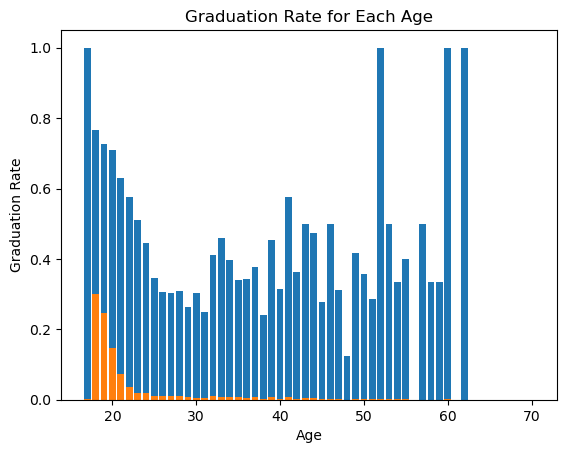

,Age,Count,Graduation Ratio,Percentage of Graduates
0,17.0,3.0,1.000000,0.001358
1,18.0,864.0,0.766204,0.299683
2,19.0,754.0,0.725464,0.247623
3,20.0,459.0,0.710240,0.147578
4,21.0,252.0,0.630952,0.071978
5,22.0,137.0,0.576642,0.035763
6,23.0,84.0,0.511905,0.019466
7,24.0,101.0,0.445545,0.020371
8,25.0,72.0,0.347222,0.011317
9,26.0,75.0,0.306667,0.010412


In [118]:
# Age Calculations

Unique_Ages = Edu_LE["Age at enrollment"].unique()
Age_DF = pd.DataFrame(columns=["Age", "Count", "Graduation Ratio", "Percentage of Graduates"])

for Age in Unique_Ages:
    Age_Index_df = Edu_LE[Edu_LE["Age at enrollment"] == Age] # Grabs rows matching unique age in df to make a new df
    Age_Index_Count = Age_Index_df["Target"].count() # counts the rows in the temporary df
    AI_Grad_C = Age_Index_df[Age_Index_df["Target"] == "Graduate"].shape[0] # counts those who graduated
    AI_Ratio = AI_Grad_C / Age_Index_Count # Ratio of those who graduated to total in df
    Sample_Percent_G = (Age_Index_Count * AI_Ratio) / Graduate_count
    
    Age_DF = Age_DF.append({
        "Age": Age,
        "Count": Age_Index_Count,
        "Graduation Ratio": AI_Ratio,
        "Percentage of Graduates": Sample_Percent_G
    }, ignore_index=True) 
        
Age_DF = Age_DF.sort_values(by=["Age"])
Age_DF = Age_DF.reset_index(drop=True)

# Data
age = Age_DF["Age"]
grad_ratio = Age_DF["Graduation Ratio"]
Percent = Age_DF["Percentage of Graduates"]

# Plot the bar chart
plt.bar(age, grad_ratio)
plt.bar(age, Percent)
        
# Label the x-axis and y-axis
plt.xlabel("Age")
plt.ylabel("Graduation Rate")

# Title for the chart
plt.title("Graduation Rate for Each Age")

# Show the plot
plt.show()
Age_DF

In [43]:
# International Student Status Calculations